<a href="https://colab.research.google.com/github/blajiness/CHE_7530-Assignments/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 - Image Processing
MSE 7530, Fall 2025

This assignment is meant to be somewhat of a break from the last assignments which were quite quantitative. In this assignment, you will pick your favorite scientific image in which you want to count particles, find borders, find domain sizes, or otherwise quantify. You may use any source; if you are stuck, you may want to start with the resources posted in the Canvas Modules.

Your single assignment is first to pick an image (or time series of images) and **state an image-processing goal**: for example, to determine the distance that a crystal grew in a specific amount of time, or to count the number of bacteria colonies in a petri dish. Then, load this image into a NumPy array (code provided in class notebook) and perform your choice of operations to bring you closer to solving the problem. **You do not need to solve the problem**: if you do solve the problem, show how you did it and explain how this would speed up analysis; comment on whether it would be easy to automate or if you would need human intervention. If you are not able to meet your goal, state what makes the image difficult to process. Skim the assigned reading and see if there are any tools that look like they might help, and state them.

I encourage you to spend as much effort on this assignment as you want; if you regularly analyze images in your research, this is a great opportunity to think about automating your own workflow and getting my help/advice for free.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import scipy.ndimage as ndi

In [73]:
image = '/sim_Microarray_Gray.png'


In [74]:
intensity = ski.io.imread(image)

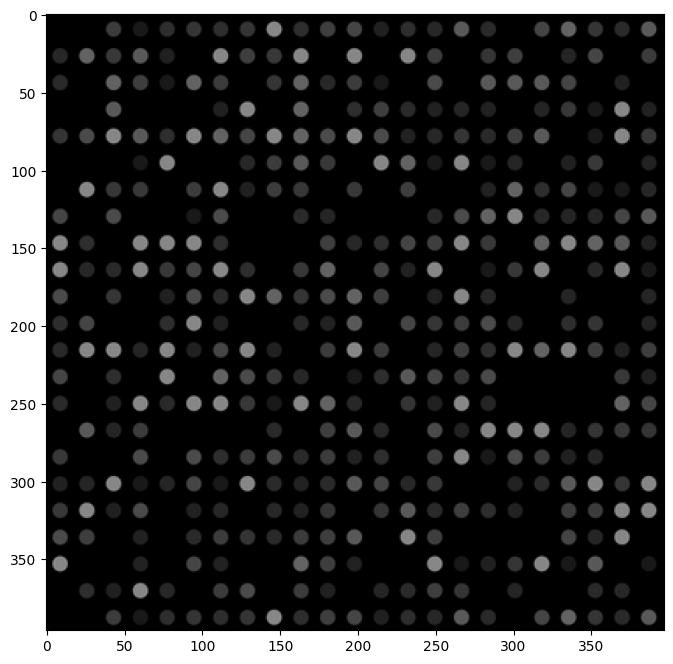

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(intensity, cmap='viridis')

In [76]:
intensity = intensity[:,:,0]

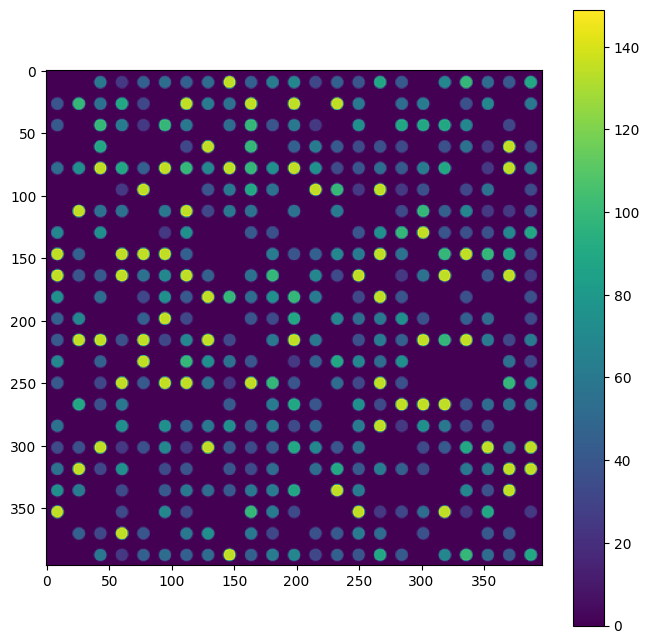

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(intensity, cmap='viridis')
cb = ax.imshow(intensity, cmap='viridis')
plt.colorbar(cb)

**Problem:** turn this simulated micro array(23x23) into a 23x23 matrix of numeric intensities. This will allow us to compare these intensities to a serial dilution curve and compute their concentration

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
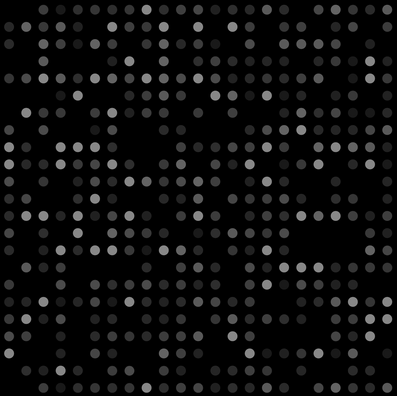

In [78]:
intensity

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
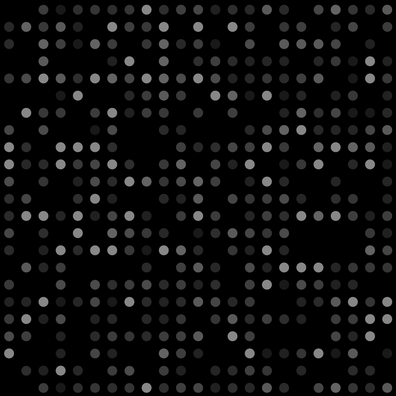

In [79]:
intensity = intensity[:,0:396]
intensity

Enter center of first spot(x):10
Enter center of first spot(y):9
Enter center of last spot(x) diagonal to first:388
Enter center of last spot(y) diagonal to first:387
Enter number of wells in x direction:23
Enter number of wells in y direction:23


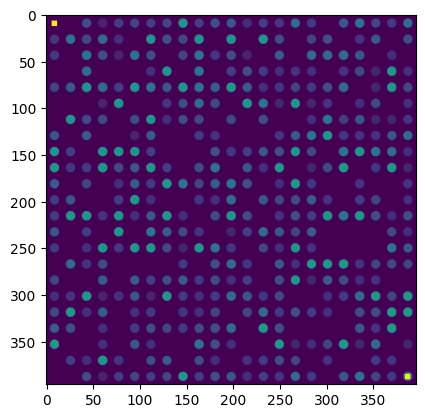

In [115]:
dotted_intensity = intensity.copy()
first_dotx = int(input("Enter center of first spot(x):")) #for this image 10,9
first_doty = int(input("Enter center of first spot(y):"))
last_dotx = int(input("Enter center of last spot(x) diagonal to first:"))# for this image  388,387
last_doty = int(input("Enter center of last spot(y) diagonal to first:"))
dotted_intensity[first_dotx-3:first_dotx+3,first_doty-3:first_doty+3] = 255
dotted_intensity[last_dotx-3:last_dotx+3,last_doty-3:last_doty+3] = 255
plt.imshow(dotted_intensity)
xlength = last_dotx-first_dotx
ylength = last_doty-first_doty
wellsx = int(input("Enter number of wells in x direction:")) #23,23
wellsy = int(input("Enter number of wells in y direction:"))
xcoord = np.linspace(first_dotx,last_dotx,wellsx)
ycoord = np.linspace(first_doty,last_doty,wellsy)



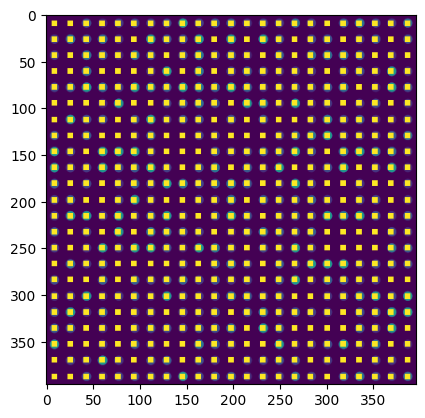

In [116]:
for i in range(wellsy):
  for j in range(wellsx):
    dotted_intensity[int(xcoord[i])-3:int(xcoord[i])+3,int(ycoord[j])-3:int(ycoord[j])+3] = 255
plt.imshow(dotted_intensity)

In [118]:
intensity_array = np.zeros((wellsx,wellsy)) #this makes the array and averages the center of the spots while reducing size to minimize off-center error
for i in range(wellsx):
  for j in range(wellsy):
    intensity_array[i,j] = np.mean(intensity[int(xcoord[i])-1:int(xcoord[i])+1,int(ycoord[j])-1:int(ycoord[j])+1])
intensity_array

array([[  0.,   0.,  60.,  25.,  46.,  53.,  46.,  53., 135.,  46.,  62.,
         69.,  32.,  46.,  39.,  89.,  42.,   0.,  69.,  99.,  53.,  42.,
         89.],
       [ 39.,  99.,  56.,  89.,  32.,   0., 135.,  62.,  56., 135.,   0.,
        135.,   0., 135.,  60.,   0.,  53.,  62.,   0.,  37.,  69.,   0.,
         60.],
       [ 42.,   0.,  99.,  62.,  25.,  99.,  60.,   0.,  53.,  99.,  39.,
         60.,  25.,   0.,  75.,   0.,  89.,  89.,  89.,  69.,   0.,  32.,
          0.],
       [  0.,   0.,  89.,   0.,   0.,   0.,  32., 135.,   0.,  99.,   0.,
         46.,  62.,  42.,  34.,  37.,  34.,   0.,  37.,  56.,  25., 135.,
         34.],
       [ 53.,  75., 135.,  89.,  46., 135.,  99.,  69., 135.,  99.,  75.,
        135.,  75.,  34.,  39.,  53.,  42.,  62.,  89.,   0.,  25., 135.,
         56.],
       [  0.,   0.,   0.,  25., 135.,   0.,   0.,  39.,  60.,  89.,  56.,
          0., 135.,  99.,  25., 135.,  25.,  37.,   0.,  32.,  56.,   0.,
         34.],
       [  0., 135.,  5

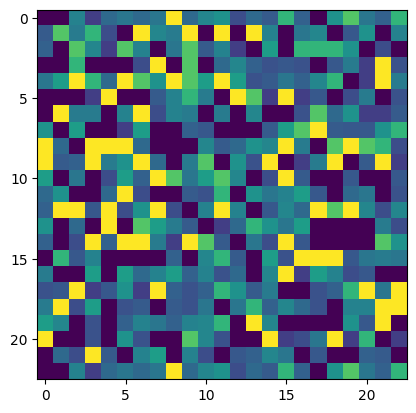

In [125]:
plt.imshow(intensity_array)

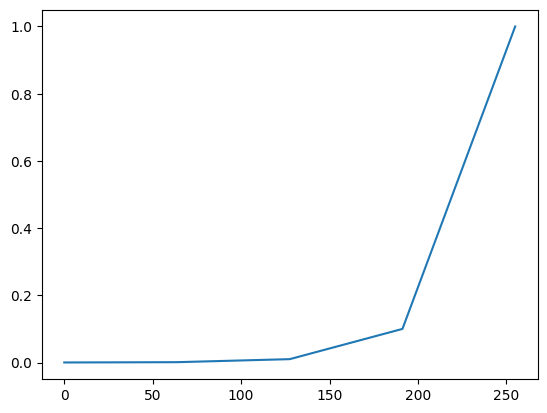

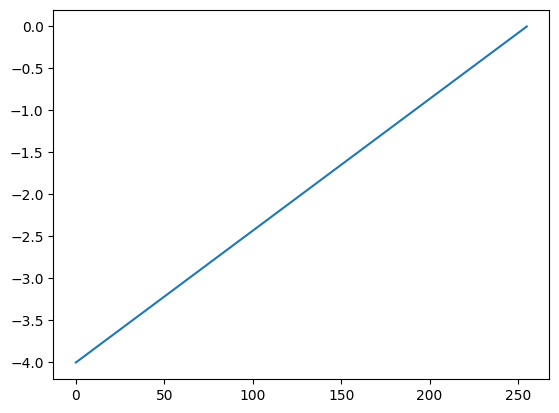

In [135]:
Serial_curve_intensity = np.linspace(0,255,5)
serial_curve_concentration = (0.0001,0.001,0.01,0.1,1)
plt.plot(Serial_curve_intensity,(serial_curve_concentration))
plt.show()
plt.plot(Serial_curve_intensity,np.log10(serial_curve_concentration))
#plt.semilogy(Serial_curve_intensity,serial_curve_concentration)


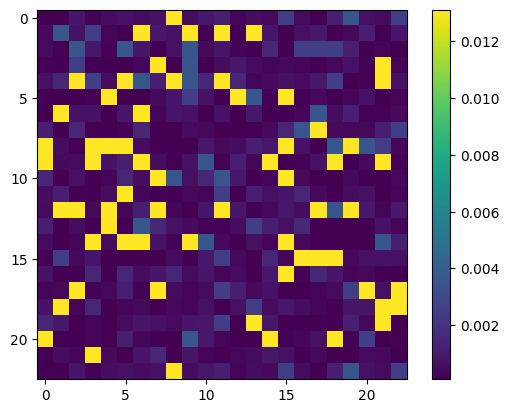

In [138]:
Concentration_array = np.zeros((wellsx,wellsy))
for i in range(wellsx):
  for j in range(wellsy):
    Concentration_array[i,j] = 10**(intensity_array[i,j]*4/255 -4)
plt.imshow(Concentration_array)
plt.colorbar()